In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#uploading the filtred database
filtred_db = pd.read_csv('filtred.csv')
filtred_db

,Expéditeur,Notes,References,Noms cités,Sujet,Titre,Date,Provenance,Destination,Destinataire
0,Viviani Vincenzo 1622-1703,"Tipologia: letteraIncipit: ""Come posso non agg...","<td class=""fieldValue""><img border=""0"" src=""ht...","Torricelli, Evangelista, 1608-1647,(citato.)Ri...",NaN,Viviani Vincenzo a Ricci Michelangelo,20/05/1646,Firenze,Roma,Ricci Michelangelo
1,Viviani Vincenzo 1622-1703,"Tipologia: letteraIncipit: ""Reputo a mio gran ...","<td class=""fieldValue""><img border=""0"" src=""ht...","Torricelli, Evangelista, 1608-1647,(citato.)Re...",NaN,Viviani Vincenzo a Renieri Vincenzo,13/04/1647,Firenze,Pisa,Renieri Vincenzo
2,Viviani Vincenzo 1622-1703,"Tipologia: letteraIncipit: ""L'esser io per spa...","<td class=""fieldValue""><img border=""0"" src=""ht...","Torricelli, Evangelista, 1608-1647,(citato.)Ri...",NaN,Viviani Vincenzo a Ricci Michelangelo,24/11/1648,Firenze,Roma,Ricci Michelangelo
3,Viviani Vincenzo 1622-1703,"Tipologia: letteraIncipit: ""Haverei necessità ...","<td class=""fieldValue""><img border=""0"" src=""ht...","Cecchi, Andrea, sec. XVII,(citato.)Arrighetti,...",NaN,Viviani Vincenzo a Manetti Braccio,18/10/1651,NaN,Firenze,Manetti Braccio
4,Viviani Vincenzo 1622-1703,"Tipologia: letteraIncipit: ""Qui tutto giorno c...","<td class=""fieldValue""><img border=""0"" src=""ht...","Di Pietro, sec. XVII,(citato.)Viviani, Alamann...",Argomenti privati,Viviani Vincenzo a Viviani Alamanno,23/02/1652,Firenze,NaN,Viviani Alamanno
...,...,...,...,...,...,...,...,...,...,...
2869,Viviani Vincenzo 1622-1703,"Tipologia: letteraIncipit: ""Così cadano dal Ci...","<td class=""fieldValue""><img border=""0"" src=""ht...","Democritus, ca. 460-ca. 370 a.C.,(citato.)Maga...",NaN,Viviani Vincenzo a Magalotti Lorenzo,Unidentified,NaN,NaN,Magalotti Lorenzo
2870,Magalotti Lorenzo 1637-1712,"Tipologia: letteraIncipit: ""Tra gli applausi d...","<td class=""fieldValue""><img border=""0"" src=""ht...","Viviani, Vincenzo, 1622-1703,(destinatario.)",NaN,Magalotti Lorenzo a Viviani Vincenzo,Unidentified,NaN,NaN,Viviani Vincenzo
2871,Steensen Niels 1638-1686,"Tipologia: letteraIncipit: ""Mi scusi di non es...","<td class=""fieldValue""><img border=""0"" src=""ht...","Viviani, Vincenzo, 1622-1703,(destinatario.)",NaN,Steensen Niels a Viviani Vincenzo,Unidentified,NaN,NaN,Viviani Vincenzo
2872,Viviani Vincenzo 1622-1703,"Tipologia: letteraIncipit: ""Se le velocità de ...","<td class=""fieldValue""><img border=""0"" src=""ht...","Ferdinando II, granduca di Toscana, 1610-1670,...",NaN,"Viviani Vincenzo a Ferdinando (II, granduca di...",Unidentified,NaN,NaN,"Ferdinando (II, granduca di Toscana)"


In [230]:
sent = filtred_with_year.loc[filtred_with_year['Expéditeur'].str.contains('Viviani')]
sent = sent.loc[sent['Expéditeur'].str.contains('Vincenzo')]
Received = filtred_with_year.loc[filtred_with_year['Destinataire'].str.contains('Viviani')]
Received = Received.loc[Received['Destinataire'].str.contains('Vincenzo')]

In [243]:
sent['Year'].unique()

array(['1646', '1647', '1648', '1651', '1652', '1653', '1654', '1655',
       '1656', '1657', '1658', '1659', '1660', 'Unidentified', '1661',
       '1662', '1663', '1664', '1665', '1666', '1667', '1668', '1669',
       '1670', '1671', '1672', '1673', '1674', '1675', '1676', '1677',
       '1678', '1679', '1680', '1681', '1682', '1683', '1684', '1685',
       '1686', '1687', '1688', '1689', '1690', '1691', '1692', '1693',
       '1694', '1695', '1696', '1697', '1698', '1699', '1700', '1644',
       '1701'], dtype=object)

In [231]:
compression_opts = dict(method='zip',
                        archive_name='sent_year.csv')  
sent.to_csv('Sent_year.zip', index=False,
          compression=compression_opts)

compression_opts = dict(method='zip',
                        archive_name='received_year.csv')  
Received.to_csv('Received_year.zip', index=False,
          compression=compression_opts)

In [78]:
filtred_db['Date'] = filtred_db['Date'].map(lambda x: x.replace(']',''))

In [87]:
#manually fixing a date
filtred_db['Date'] = filtred_db['Date'].map(lambda x: x.replace('/4-6','1681'))

In [97]:
#manually fixing dates written in Roman
filtred_db['Date'] = filtred_db['Date'].map(lambda x: x.replace('CLXX','1670'))
filtred_db['Date'] = filtred_db['Date'].map(lambda x: x.replace('DCLX','1670'))

In [98]:
filtred_with_year = filtred_db
filtred_with_year['Year'] = filtred_db['Date'].str[-4:]
filtred_with_year.loc[filtred_with_year['Year'].str.contains('fied'),'Year'] = 'Unidentified'

In [99]:
filtred_with_year

,Expéditeur,Notes,References,Noms cités,Sujet,Titre,Date,Provenance,Destination,Destinataire,Year
0,Viviani Vincenzo 1622-1703,"Tipologia: letteraIncipit: ""Come posso non agg...","<td class=""fieldValue""><img border=""0"" src=""ht...","Torricelli, Evangelista, 1608-1647,(citato.)Ri...",NaN,Viviani Vincenzo a Ricci Michelangelo,20/05/1646,Firenze,Roma,Ricci Michelangelo,1646
1,Viviani Vincenzo 1622-1703,"Tipologia: letteraIncipit: ""Reputo a mio gran ...","<td class=""fieldValue""><img border=""0"" src=""ht...","Torricelli, Evangelista, 1608-1647,(citato.)Re...",NaN,Viviani Vincenzo a Renieri Vincenzo,13/04/1647,Firenze,Pisa,Renieri Vincenzo,1647
2,Viviani Vincenzo 1622-1703,"Tipologia: letteraIncipit: ""L'esser io per spa...","<td class=""fieldValue""><img border=""0"" src=""ht...","Torricelli, Evangelista, 1608-1647,(citato.)Ri...",NaN,Viviani Vincenzo a Ricci Michelangelo,24/11/1648,Firenze,Roma,Ricci Michelangelo,1648
3,Viviani Vincenzo 1622-1703,"Tipologia: letteraIncipit: ""Haverei necessità ...","<td class=""fieldValue""><img border=""0"" src=""ht...","Cecchi, Andrea, sec. XVII,(citato.)Arrighetti,...",NaN,Viviani Vincenzo a Manetti Braccio,18/10/1651,NaN,Firenze,Manetti Braccio,1651
4,Viviani Vincenzo 1622-1703,"Tipologia: letteraIncipit: ""Qui tutto giorno c...","<td class=""fieldValue""><img border=""0"" src=""ht...","Di Pietro, sec. XVII,(citato.)Viviani, Alamann...",Argomenti privati,Viviani Vincenzo a Viviani Alamanno,23/02/1652,Firenze,NaN,Viviani Alamanno,1652
...,...,...,...,...,...,...,...,...,...,...,...
2869,Viviani Vincenzo 1622-1703,"Tipologia: letteraIncipit: ""Così cadano dal Ci...","<td class=""fieldValue""><img border=""0"" src=""ht...","Democritus, ca. 460-ca. 370 a.C.,(citato.)Maga...",NaN,Viviani Vincenzo a Magalotti Lorenzo,Unidentified,NaN,NaN,Magalotti Lorenzo,Unidentified
2870,Magalotti Lorenzo 1637-1712,"Tipologia: letteraIncipit: ""Tra gli applausi d...","<td class=""fieldValue""><img border=""0"" src=""ht...","Viviani, Vincenzo, 1622-1703,(destinatario.)",NaN,Magalotti Lorenzo a Viviani Vincenzo,Unidentified,NaN,NaN,Viviani Vincenzo,Unidentified
2871,Steensen Niels 1638-1686,"Tipologia: letteraIncipit: ""Mi scusi di non es...","<td class=""fieldValue""><img border=""0"" src=""ht...","Viviani, Vincenzo, 1622-1703,(destinatario.)",NaN,Steensen Niels a Viviani Vincenzo,Unidentified,NaN,NaN,Viviani Vincenzo,Unidentified
2872,Viviani Vincenzo 1622-1703,"Tipologia: letteraIncipit: ""Se le velocità de ...","<td class=""fieldValue""><img border=""0"" src=""ht...","Ferdinando II, granduca di Toscana, 1610-1670,...",NaN,"Viviani Vincenzo a Ferdinando (II, granduca di...",Unidentified,NaN,NaN,"Ferdinando (II, granduca di Toscana)",Unidentified


In [212]:
#saving the changes
compression_opts = dict(method='zip',
                        archive_name='filtred_year.csv')  
filtred_with_year.to_csv('filtred_year.zip', index=False,
          compression=compression_opts)

In [100]:
filtred_with_year.Provenance.value_counts()[-138:]

Bologna                 77
Venezia                 63
Prato                   35
Chiusi                  34
Siena                   34
                        ..
Certaldo                 1
S. Matteo in Arcetri     1
Terni                    1
Amburgo                  1
Sartiano                 1
Name: Provenance, Length: 138, dtype: int64

In [101]:
sum(filtred_with_year.Provenance.value_counts()[-138:])

792

<AxesSubplot:>

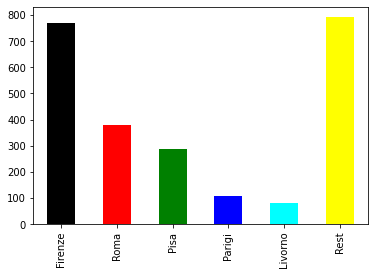

In [102]:
top_5 = filtred_with_year.Provenance.value_counts().nlargest(6)
top_5[5]= sum(filtred_with_year.Provenance.value_counts()[-138:])
top_5 = top_5.rename(index={'Bologna':'Rest'})
top_5
top_5.plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan', 'yellow'])

In [115]:
len(filtred_with_year.Destination.value_counts())

66

In [128]:
filtred_with_year.Destination.value_counts().index[5]

'Livorno'

<AxesSubplot:>

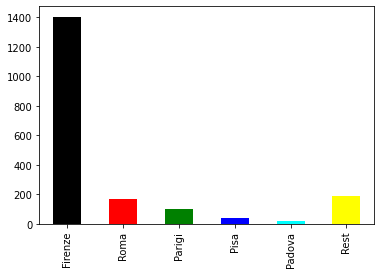

In [104]:
top_5 = filtred_with_year.Destination.value_counts().nlargest(6)
top_5[5]= sum(filtred_with_year.Destination.value_counts()[-61:])
top_5 = top_5.rename(index={'Livorno':'Rest'})
top_5
top_5.plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan', 'yellow'])

In [113]:
filtred_with_year.Year.unique()
filtred_id = filtred_with_year.loc[filtred_with_year['Year'].str.find('Unidentified') != 0]
filtred_id

,Expéditeur,Notes,References,Noms cités,Sujet,Titre,Date,Provenance,Destination,Destinataire,Year
0,Viviani Vincenzo 1622-1703,"Tipologia: letteraIncipit: ""Come posso non agg...","<td class=""fieldValue""><img border=""0"" src=""ht...","Torricelli, Evangelista, 1608-1647,(citato.)Ri...",NaN,Viviani Vincenzo a Ricci Michelangelo,20/05/1646,Firenze,Roma,Ricci Michelangelo,1646
1,Viviani Vincenzo 1622-1703,"Tipologia: letteraIncipit: ""Reputo a mio gran ...","<td class=""fieldValue""><img border=""0"" src=""ht...","Torricelli, Evangelista, 1608-1647,(citato.)Re...",NaN,Viviani Vincenzo a Renieri Vincenzo,13/04/1647,Firenze,Pisa,Renieri Vincenzo,1647
2,Viviani Vincenzo 1622-1703,"Tipologia: letteraIncipit: ""L'esser io per spa...","<td class=""fieldValue""><img border=""0"" src=""ht...","Torricelli, Evangelista, 1608-1647,(citato.)Ri...",NaN,Viviani Vincenzo a Ricci Michelangelo,24/11/1648,Firenze,Roma,Ricci Michelangelo,1648
3,Viviani Vincenzo 1622-1703,"Tipologia: letteraIncipit: ""Haverei necessità ...","<td class=""fieldValue""><img border=""0"" src=""ht...","Cecchi, Andrea, sec. XVII,(citato.)Arrighetti,...",NaN,Viviani Vincenzo a Manetti Braccio,18/10/1651,NaN,Firenze,Manetti Braccio,1651
4,Viviani Vincenzo 1622-1703,"Tipologia: letteraIncipit: ""Qui tutto giorno c...","<td class=""fieldValue""><img border=""0"" src=""ht...","Di Pietro, sec. XVII,(citato.)Viviani, Alamann...",Argomenti privati,Viviani Vincenzo a Viviani Alamanno,23/02/1652,Firenze,NaN,Viviani Alamanno,1652
...,...,...,...,...,...,...,...,...,...,...,...
2864,Rinaldini Carlo 1615-1698,"Tipologia: letteraIncipit: ""Ricevo qui in Livo...","<td class=""fieldValue""><img border=""0"" src=""ht...","Medici, Leopoldo de', 1617-1675,(citato.)Vivia...",NaN,Rinaldini Carlo a Viviani Vincenzo,30/01/1658,Livorno,Firenze,Viviani Vincenzo,1658
2865,Rinaldini Carlo 1615-1698,"Tipologia: letteraIncipit: ""Son ritornato in P...","<td class=""fieldValue""><img border=""0"" src=""ht...","Serenai, Lodovico, 1599-1685,(citato.)Viviani,...",NaN,Rinaldini Carlo a Viviani Vincenzo,1/02/1658,NaN,NaN,Viviani Vincenzo,1658
2866,Rinaldini Carlo 1615-1698,"Tipologia: letteraIncipit: ""Ricevo questa matt...","<td class=""fieldValue""><img border=""0"" src=""ht...","Viviani, Vincenzo, 1622-1703,(destinatario.)Gu...",NaN,Rinaldini Carlo a Viviani Vincenzo,4/02/1658,NaN,NaN,Viviani Vincenzo,1658
2867,Rinaldini Carlo 1615-1698,"Tipologia: letteraIncipit: ""Servirò V.S. e que...","<td class=""fieldValue""><img border=""0"" src=""ht...","Della Rena, Cosimo, sec. XVII,(citato.)Galilei...",NaN,Rinaldini Carlo a Viviani Vincenzo,25/02/1658,NaN,FirenzePisa,Viviani Vincenzo,1658


In [198]:
filtred_id_test = filtred_id.loc[filtred_id['Year'].str.find('1650')!= -1] 
filtred_id_test

,Expéditeur,Notes,References,Noms cités,Sujet,Titre,Date,Provenance,Destination,Destinataire,Year
1299,Del Bianco Baccio 1604-1656,"Tipologia: letteraIncipit: ""L'indugio piglia v...","<td class=""fieldValue""><img border=""0"" src=""ht...","Viviani, Vincenzo, 1622-1703,(destinatario.)Ba...",Argomenti privati,Del Bianco Baccio a Viviani Vincenzo,17/01/1650,Genova,NaN,Viviani Vincenzo,1650


In [166]:
len(filtred_id_test.index)

2

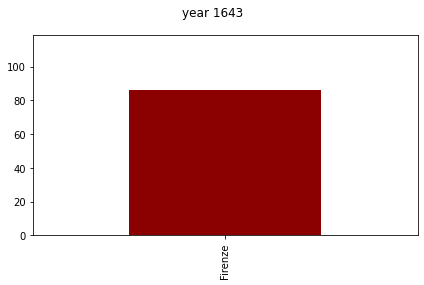

In [210]:
#Going through all years for letters sent
for i in filtred_id.Year.unique():
    filtred_id_i = filtred_id.loc[filtred_id['Year'].str.find(str(i))!= -1] 
    filtred_id_i = filtred_id_i.dropna(subset=['Destination'])
    plt.suptitle('year '+str(i))
    if filtred_id_i.empty:
        pass
    else:
        if((len(filtred_id_i.Destination.unique()) <= 5) & (len(filtred_id_i.Destination.unique()) > 0)):
            filtred_id_i.Destination.value_counts().plot(kind='bar',color=['darkred', 'tomato', 'chocolate', 'gold', 'darkgreen', 'dimgray'])
            plt.tight_layout()
            plt.savefig('Year ' +str(i) + ' Envoyées & Cumulées.png',dpi=150)
        else:
            top_5 = filtred_id_i.Destination.value_counts().nlargest(6)
            top_5[5]= sum(filtred_id_i.Destination.value_counts()[-(len(filtred_id_i.value_counts())-5):])
            top_5 = top_5.rename(index={top_5.index[5]:'Others'})
            top_5.plot(kind='bar',color=['darkred', 'tomato', 'chocolate', 'gold', 'darkgreen', 'dimgray'])
            plt.tight_layout()
            plt.savefig('Year ' +str(i) + ' Envoyées & Cumulées.png', dpi=150)
    
    

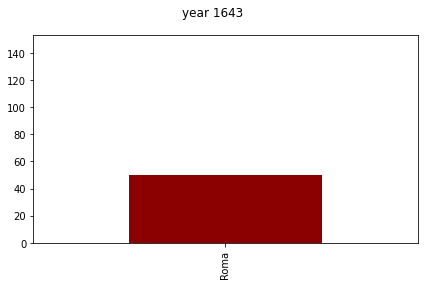

In [225]:
#Going through all years for letters Received

for i in filtred_id.Year.unique():
    filtred_id_i = filtred_id.loc[filtred_id['Year'].str.find(str(i))!= -1] 
    filtred_id_i = filtred_id_i.dropna(subset=['Provenance'])
    plt.suptitle('year '+str(i))
    if filtred_id_i.empty:
        pass
    else:
        if((len(filtred_id_i.Provenance.unique()) <= 5) & (len(filtred_id_i.Provenance.unique()) > 0)):
            filtred_id_i.Provenance.value_counts().plot(kind='bar',color=['darkred', 'tomato', 'chocolate', 'gold', 'darkgreen', 'dimgray'])
            plt.tight_layout()
            plt.savefig('Year ' +str(i) + ' Envoyées & Cumulées.png',dpi=150)
        else:
            top_5 = filtred_id_i.Provenance.value_counts().nlargest(6)
            top_5[5]= sum(filtred_id_i.Provenance.value_counts()[-(len(filtred_id_i.value_counts())-5):])
            top_5 = top_5.rename(index={top_5.index[5]:'Others'})
            top_5.plot(kind='bar',color=['darkred', 'tomato', 'chocolate', 'gold', 'darkgreen', 'dimgray'])
            plt.tight_layout()
            plt.savefig('Year ' +str(i) + ' Envoyées & Cumulées.png', dpi=150)

<ipython-input-249-bea257211b45>:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


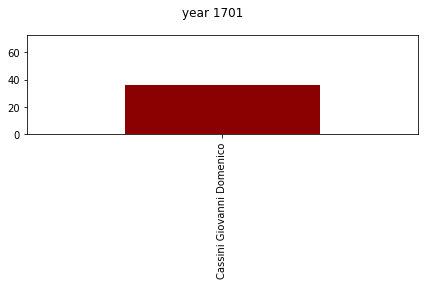

In [249]:
#Going through all years for correspondants

sent_id = sent.loc[sent['Year'].str.find('Unidentified') != 0]
for i in sent_id.Year.unique():
    sent_id_i = sent_id.loc[sent_id['Year'].str.find(str(i))!= -1] 
    sent_id_i = sent_id_i.dropna(subset=['Destinataire'])
    plt.suptitle('year '+str(i))
    if filtred_id_i.empty:
        pass
    else:
        if(len(sent_id_i.Destinataire.unique()) <= 5) & (len(sent_id_i.Destinataire.unique()) > 0) :
            sent_id_i.Destinataire.value_counts().plot(kind='bar',color=['darkred', 'tomato', 'chocolate', 'gold', 'darkgreen', 'dimgray'])
            plt.tight_layout()
            plt.savefig('Year ' +str(i) + ' Envoyées & Cumulées.png',dpi=150)
        else:
            top_5 = sent_id_i.Destinataire.value_counts().nlargest(6)
            top_5[5]= sum(sent_id_i.Destinataire.value_counts()[-(len(sent_id_i.value_counts())-5):])
            top_5 = top_5.rename(index={top_5.index[5]:'Others'})
            top_5.plot(kind='bar',color=['darkred', 'tomato', 'chocolate', 'gold', 'darkgreen', 'dimgray'])
            plt.tight_layout()
            plt.savefig('Year ' +str(i) + ' Envoyées.png', dpi=150)

<ipython-input-259-5722879e7846>:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


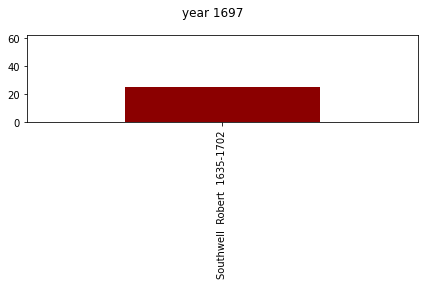

In [259]:
#Going through all years for correspondants

received_id = Received.loc[Received['Year'].str.find('Unidentified') != 0]
for i in received_id.Year.unique():
    received_id_i = received_id.loc[received_id['Year'].str.find(str(i))!= -1] 
    received_id_i = received_id_i.dropna(subset=['Expéditeur'])
    plt.suptitle('year '+str(i))
    if filtred_id_i.empty:
        pass
    else:
        if(len(received_id_i['Expéditeur'].unique()) <= 5) & (len(received_id_i['Expéditeur'].unique()) > 0) :
            received_id_i['Expéditeur'].value_counts().plot(kind='bar',color=['darkred', 'tomato', 'chocolate', 'gold', 'darkgreen', 'dimgray'])
            plt.tight_layout()
            plt.savefig('Year ' +str(i) + ' Reçues.png',dpi=150)
        else:
            top_5 = received_id_i['Expéditeur'].value_counts().nlargest(6)
            top_5[5]= sum(received_id_i['Expéditeur'].value_counts()[-(len(received_id_i['Expéditeur'].value_counts())-5):])
            top_5 = top_5.rename(index={top_5.index[5]:'Others'})
            top_5.plot(kind='bar',color=['darkred', 'tomato', 'chocolate', 'gold', 'darkgreen', 'dimgray'])
            plt.tight_layout()
            plt.savefig('Year ' +str(i) + ' Reçues.png', dpi=150)

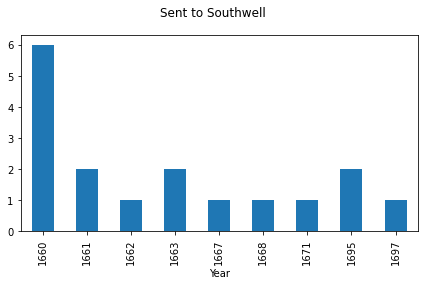

In [301]:
#Going through all years for Southwell
plt.suptitle('Sent to Southwell')
sent_id = sent.loc[sent['Year'].str.find('Unidentified') != 0]
sent_southwell = sent_id.loc[sent_id['Destinataire'].str.find('Southwell') != -1]
sent_southwell.value_counts('Year').sort_index().plot(kind = 'bar')
plt.tight_layout()
plt.savefig('Sent to southwell.png', dpi=150)



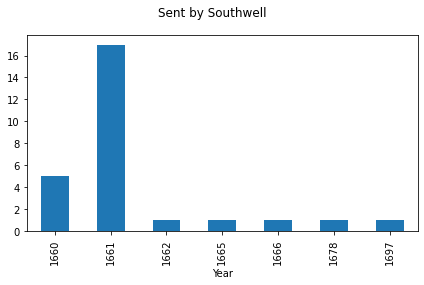

In [303]:
plt.suptitle('Sent by Southwell')
received_id = Received.loc[Received['Year'].str.find('Unidentified') != 0]
received_southwell = received_id.loc[received_id['Expéditeur'].str.find('Southwell') != -1]
received_southwell.value_counts('Year').sort_index().plot(kind = 'bar')
plt.tight_layout()
plt.savefig('Sent by southwell.png', dpi=150)

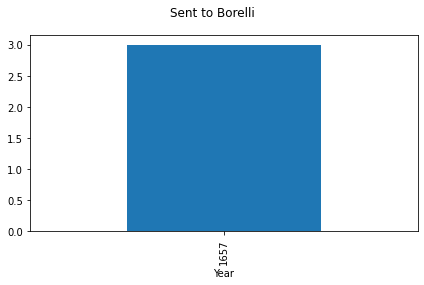

In [304]:
#Going through all years for Borelli
plt.suptitle('Sent to Borelli')
sent_id = sent.loc[sent['Year'].str.find('Unidentified') != 0]
sent_southwell = sent_id.loc[sent_id['Destinataire'].str.find('Borelli') != -1]
sent_southwell.value_counts('Year').sort_index().plot(kind = 'bar')
plt.tight_layout()
plt.savefig('Sent to Borelli.png', dpi=150)



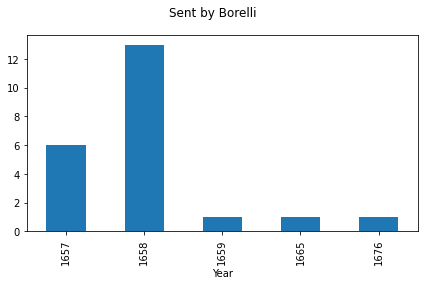

In [305]:
plt.suptitle('Sent by Borelli')
received_id = Received.loc[Received['Year'].str.find('Unidentified') != 0]
received_Borelli = received_id.loc[received_id['Expéditeur'].str.find('Borelli') != -1]
received_Borelli.value_counts('Year').sort_index().plot(kind = 'bar')
plt.tight_layout()
plt.savefig('Sent by Borelli.png', dpi=150)